In [1]:
#Import needed packages

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate inputs
x = torch.linspace(-1, 1, 1000).view(-1, 1)  # Choose a range to capture several periods of the sine function

# Calculate outputs for the function
y = torch.sign(torch.sin(5 * np.pi * x))

# Dataset and DataLoader
from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [3]:
# DNN1
class DNN1(nn.Module):
    def __init__(self):
        super(DNN1, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.fc(x)

# DNN2
class DNN2(nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1),
        )

    def forward(self, x):
        return self.fc(x)

# Initialize the models
model1 = DNN1().to(device)
model2 = DNN2().to(device)

In [4]:
# Loss function
criterion = nn.MSELoss()

# Optimizers
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

In [5]:
def train_model(model, optimizer, dataloader, epochs=1000):
    model.train()
    
    losses = []  
    
    for epoch in range(epochs):
        epoch_losses = []
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        epoch_loss = np.mean(epoch_losses)  # Average loss for the epoch
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}')
    return losses

# implement
losses_model1 = train_model(model1, optimizer1, dataloader)
losses_model2 = train_model(model2, optimizer2, dataloader)

Epoch 1, Loss: 0.9881448242813349
Epoch 2, Loss: 0.9624875951558352
Epoch 3, Loss: 0.964266013354063
Epoch 4, Loss: 0.9456660095602274
Epoch 5, Loss: 0.9442319311201572
Epoch 6, Loss: 0.9288027454167604
Epoch 7, Loss: 0.924989765509963
Epoch 8, Loss: 0.9144615158438683
Epoch 9, Loss: 0.8945266045629978
Epoch 10, Loss: 0.8890246413648129
Epoch 11, Loss: 0.8746359683573246
Epoch 12, Loss: 0.8742615561932325
Epoch 13, Loss: 0.8591386638581753
Epoch 14, Loss: 0.8559015821665525
Epoch 15, Loss: 0.8548755664378405
Epoch 16, Loss: 0.8507637325674295
Epoch 17, Loss: 0.8434470277279615
Epoch 18, Loss: 0.8356447909027338
Epoch 19, Loss: 0.8355881702154875
Epoch 20, Loss: 0.8329014964401722
Epoch 21, Loss: 0.8298453353345394
Epoch 22, Loss: 0.8108760062605143
Epoch 23, Loss: 0.8087720088660717
Epoch 24, Loss: 0.814755018800497
Epoch 25, Loss: 0.8028025086969137
Epoch 26, Loss: 0.8180547244846821
Epoch 27, Loss: 0.7980219777673483
Epoch 28, Loss: 0.8003494143486023
Epoch 29, Loss: 0.78232360817492

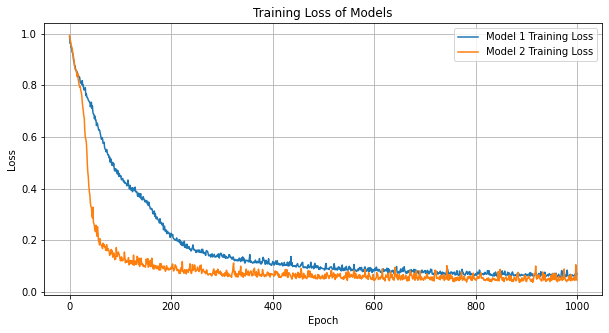

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(losses_model1, label='Model 1 Training Loss')
plt.plot(losses_model2, label='Model 2 Training Loss')
plt.title('Training Loss of Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

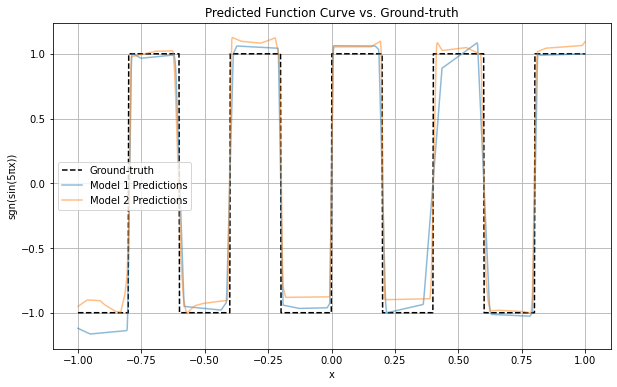

In [12]:
x_device = x.to(device)

#Turn to eval mode
model1.eval() 
model2.eval()

with torch.no_grad():
    y_pred_model1 = model1(x_device)
    y_pred_model2 = model2(x_device)

#flatten
y_pred_model1_np = y_pred_model1.cpu().numpy().flatten()
y_pred_model2_np = y_pred_model2.cpu().numpy().flatten()

y_true_np = y
x_np = x.numpy().flatten()


plt.figure(figsize=(10, 6))
plt.plot(x_np, y_true_np, label='Ground-truth', color='black', linestyle='--')
plt.plot(x_np, y_pred_model1_np, label='Model 1 Predictions', alpha=0.5)
plt.plot(x_np, y_pred_model2_np, label='Model 2 Predictions', alpha=0.5)
plt.title('Predicted Function Curve vs. Ground-truth')
plt.xlabel('x')
plt.ylabel('sgn(sin(5πx))')
plt.legend()
plt.grid(True)
plt.show()